<h2 style="color:darkred;font-size:30px">Projet 3 : Anticipez les besoins en consommation électrique de bâtiments</h2>

<img src="images\seattle.png" alt="Drawing" style="width: 250px;"/>

<h2 style="color:darkred;font-size:30px">Notebook 3 : Modélisation (TotalGHGEmissions)</h2>

---
---
---

<h2 style="color:darkred;font-size:20px">Dataset resource</h2>

Nous avons à notre disposition le jeu de données sur le lien :

https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

1. Réaliser une courte analyse exploratoire.
2. Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

<h2 style="color:darkred;font-size:20px">L'objectif</h2>

    - Nous voulons tenter de prédire les émissions de CO2 et la consommation totale d’énergie.
    - évaluer l’intérêt de l’ENERGY STAR Score pour la prédiction d’émissions.
    - Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction)

<h2 style="color:darkred;font-size:20px">Sommaire</h2>
    

In [1]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

- la régression linéaire ;
- K-nn ;
- les Support Vector Machine (SVM) ;
- les réseaux de neurones ;
- les random forests.

In [2]:
# quelques arrangement sur jupyter

# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# style de titres
font = {
    'family': 'Arial',
    'color': 'darkred',
    'weight': 'bold',
    'size': 20,
}

In [3]:
# Commençons par charger les données :
data = pd.read_csv('data/building-energy-benchmarking_transformed.csv')
print('Le jeu des données data compte {} colonnes et {} lignes.'.format(
    data.shape[1], data.shape[0]))

Le jeu des données data compte 27 colonnes et 1681 lignes.


In [4]:
data['ENERGYSTARScore'].fillna(data['ENERGYSTARScore'].mean(), inplace=True)
data['ENERGYSTARScore'] = data['ENERGYSTARScore'].apply(lambda x: round(x))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   OSEBuildingID                    1681 non-null   int64 
 1   PropertyName                     1681 non-null   object
 2   PrimaryPropertyType              1681 non-null   object
 3   NumberofBuildings                1681 non-null   int64 
 4   PropertyGFATotal                 1681 non-null   int64 
 5   PropertyGFABuilding(s)           1681 non-null   int64 
 6   LargestPropertyUseTypeGFA        1681 non-null   int64 
 7   SecondLargestPropertyUseTypeGFA  1681 non-null   int64 
 8   ZipCode                          1681 non-null   int64 
 9   HospitalGeneralMedicalSurgical   1681 non-null   int64 
 10  MedicalOffice                    1681 non-null   int64 
 11  Other                            1681 non-null   int64 
 12  SupermarketGroceryStore          1

In [6]:
data

,OSEBuildingID,PropertyName,PrimaryPropertyType,NumberofBuildings,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ZipCode,HospitalGeneralMedicalSurgical,MedicalOffice,Other,SupermarketGroceryStore,Office,NonRefrigeratedWarehouse,Hotel,RetailStore,DistributionCenter,OtherEducation,SteamUse_check,NaturalGas_check,LP_Ratio,SLP_Ratio,TLP_Ratio,SiteEnergyUse(kBtu),TotalGHGEmissions,ENERGYSTARScore
0,1,Mayflower park hotel,Hotel,1,88434,88434,88434,0,98101,0,0,0,0,0,0,1,0,0,0,1,1,100,0,0,7226362,250,60
1,2,Paramount Hotel,Hotel,1,103566,88502,83880,15064,98101,0,0,0,0,0,0,1,0,0,0,0,1,81,15,4,8387933,296,61
2,3,5673-The Westin Seattle,Hotel,1,956110,759392,756493,0,98101,0,0,0,0,0,0,1,0,0,0,1,1,79,0,0,72587024,2089,43
3,5,HOTEL MAX,Hotel,1,61320,61320,61320,0,98101,0,0,0,0,0,0,1,0,0,0,1,1,100,0,0,6794584,286,56
4,8,WARWICK SEATTLE HOTEL (ID8),Hotel,1,175580,113580,123445,68009,98121,0,0,0,0,0,0,1,0,0,0,0,1,70,39,0,14172606,505,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,50221,High Point Community Center,Other,1,18261,18261,18261,0,98100,0,0,0,0,0,0,0,0,0,0,0,1,100,0,0,932082,20,65
1677,50223,International district/Chinatown CC,Other,1,16000,16000,16000,0,98100,0,0,0,0,0,0,0,0,0,0,0,1,100,0,0,950276,32,65
1678,50224,Queen Anne Pool,Other,1,13157,13157,7583,5574,98100,0,0,0,0,0,0,0,0,0,0,0,1,58,42,0,5765898,224,65
1679,50225,South Park Community Center,Mixed Use Property,1,14101,14101,6601,6501,98100,0,0,0,0,0,0,0,0,0,0,0,1,47,46,3,719471,22,65


In [7]:
# data = data[data['NumberofBuildings'] < 11].copy()

In [8]:
# data = data[data['BuildingType'] != 'Campus']

In [9]:
#data = data[(data['PropertyGFATotal'] > 694206) | (data['NumberofBuildings'] > 4) | (data['NumberofFloors'] > 23)].copy()

# 7. Preprocessing

In [10]:
identity = [
    'OSEBuildingID',
    'PropertyName',
]

features_cat = [
    ##'BuildingType',
    'PrimaryPropertyType',
    ##'Neighborhood',
    #'LargestPropertyUseType',
    #'LP_category',
]

features_num = [
    # ----
    #'BuildingAge',
    'NumberofBuildings',
    ##'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFABuilding(s)',
    #'PropertyGFAParking',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    #'ThirdLargestPropertyUseTypeGFA',
    'ZipCode',
    
    # ----
    
    #'DataCenter',
    'HospitalGeneralMedicalSurgical',
    #'Laboratory',
    'MedicalOffice',
    'Other',
    #'Parking',
    'SupermarketGroceryStore',
    #'UrgentCareClinicOtherOutpatient',
    
    # ----
    
    'Office',
    'NonRefrigeratedWarehouse',
    #'K12School',
    'Hotel',
    #'WorshipFacility',
    'RetailStore',
    'DistributionCenter',
    'OtherEducation',

    # ----
    
    'SteamUse_check',
    #'Electricity_check',
    'NaturalGas_check',
    
    # ----
    
    #'LP_Ratio_Other',
    #'LP_Ratio_Hospital',
    #'LP_Ratio_UrgentCare',
    #'LP_Ratio_NonRefrigeratedWarehouse',
    #'LP_Ratio_K12School',
    #'LP_Ratio_RetailStore',
    #'LP_Ratio_Office',
    #'LP_Ratio_Hotel',
    #'LP_Ratio_WorshipFacility',
    #'LP_Ratio_MedicalOffice',
    #'LP_Ratio_Laboratory',
    # ----
    'LP_Ratio',
    'SLP_Ratio',
    'TLP_Ratio',
    'ENERGYSTARScore'
]

to_predict = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

energystar = ['ENERGYSTARScore']

## 7.1 Standardisation et encodage des features

StandardScaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html




In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [13]:
column_trans = make_column_transformer(
    (OneHotEncoder(), features_cat),  # encodage
    (StandardScaler(), features_num),  # standardisation
    #(StandardScaler(), features_high_corr),
    remainder='passthrough')

y = data['TotalGHGEmissions'].values
X = column_trans.fit_transform(data[features_cat + features_num])

In [14]:
X[1]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.08371986, -0.04508835,
       -0.06189846, -0.04709074, -0.06915749, -0.85348653, -0.07735917,
       -0.16394644, -0.25149773, -0.15811388, -0.65066891, -0.36748318,
        4.59547833, -0.25149773, -0.18218101, -0.04883863, -0.27225247,
        0.6303491 , -0.15527619,  0.16234228,  0.33069767, -0.18758834])

In [15]:
X.shape

(1681, 45)

## 7.2 Echantillonnage 

Faisons l'echantillonnage. Split du dataset en 2 parties : 

    - Données d’entrainement 
    - Données de test

In [16]:
# Séparons nos données en un jeu de test et un jeu d'entraînement :

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state = 42)  # 20% des données dans le jeu de test

print(f"La taille de données d'entrainement : {X_train.shape[0]}")
print(f"La taille de données d'entrainement : {X_test.shape[0]}")

La taille de données d'entrainement : 1344
La taille de données d'entrainement : 337


In [17]:
X

array([[ 0.        ,  0.        ,  1.        , ..., -0.72273026,
        -0.36548615, -0.23097524],
       [ 0.        ,  0.        ,  1.        , ...,  0.16234228,
         0.33069767, -0.18758834],
       [ 0.        ,  0.        ,  1.        , ..., -0.72273026,
        -0.36548615, -0.96855254],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.75547284,
        -0.36548615, -0.01404073],
       [ 0.        ,  0.        ,  0.        , ...,  1.99149219,
         0.15665171, -0.01404073],
       [ 0.        ,  0.        ,  0.        , ...,  1.87348251,
         0.67878958, -0.01404073]])

# 8. Les modèles testés

In [18]:
# Chargement des librairies

# Algorithmes simples
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Algorithmes ensemblistes
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Utiles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline

# Normalisation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Scoring
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#import warnings
#warnings.filterwarnings('ignore')

In [19]:
def score (modele, R2, RMSE, MAE, time):
    df_scores.loc[df_scores.shape[0]] = [modele, R2, RMSE, MAE, time]
    df_scores.sort_values(by='R2', ascending=False, inplace=True)
    df_scores.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    df_scores.reset_index(drop=True, inplace=True)
    return df_scores

In [20]:
scores = []

df_scores = pd.DataFrame(
    scores, columns=['modele', 'R2', 'RMSE', 'MAE', 'time'])


## 8.1 Linear Regression

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

In [22]:
# Prediction score :

print("R^2 : {:.4f}".format(r2_score(y_test, y_pred_lr)))

R^2 : 0.7321


In [23]:
parametres_LR = {}

# On crée un modèle de régression linéaire
# On entraîne ce modèle sur les données d'entrainement
grid_LR = GridSearchCV(LinearRegression(),
                       parametres_LR,
                       scoring='r2',
                       cv=5)
modele_LR = grid_LR.fit(X_train, y_train)
y_pred_LR = grid_LR.predict(X_test)

In [24]:
# Affichage des scores
r2_LR = r2_score(y_test, y_pred_LR)
rmse_LR = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)), 3)
mae_LR = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_LR)), 3)
time_LR = round(grid_LR.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_LR.best_params_)

# Ajoute à la liste des scores
score('Linear Regression', r2_LR, rmse_LR, mae_LR,  time_LR)

{}


,modele,R2,RMSE,MAE,time
0,Linear Regression,0.732053,332.748,7.96,0.004


## 8.2 Lasso

In [25]:
parametres_Lasso = {}

# On entraîne ce modèle sur les données d'entrainement
grid_Lasso = GridSearchCV(Lasso(), parametres_Lasso, cv=5)
modele_Lasso = grid_Lasso.fit(X_train, y_train)
y_pred_Lasso = grid_Lasso.predict(X_test)

In [26]:
# Affichage des scores
r2_Lasso = round(r2_score(y_test, y_pred_Lasso), 3)
rmse_Lasso = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_Lasso)), 3)
mae_Lasso = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_Lasso)), 3)
time_Lasso = round(grid_Lasso.cv_results_['mean_fit_time'].max(), 3)
# Les meilleur parametres
print(grid_Lasso.best_params_)

# Ajoute à la liste des scores
score('Lasso', r2_Lasso, rmse_Lasso, mae_Lasso,  time_Lasso)

{}


,modele,R2,RMSE,MAE,time
0,Linear Regression,0.732053,332.748,7.960,0.004
1,Lasso,0.732000,332.996,7.522,0.006


## 8.3 Ridge

In [27]:
parametres_Ridge = {}

# On entraîne ce modèle sur les données d'entrainement
grid_Ridge = GridSearchCV(Ridge(), parametres_Ridge, cv=5)
grid_Ridge.fit(X_train, y_train)
y_pred_Ridge = grid_Ridge.predict(X_test)

In [28]:
# Affichage des scores
r2_Ridge = round(r2_score(y_test, y_pred_Ridge), 3)
rmse_Ridge = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridge)), 3)
mae_Ridge = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_Ridge)), 3)
time_Ridge = round(grid_Ridge.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_Ridge.best_params_)

# Ajoute à la liste des scores
score('Ridge', r2_Ridge, rmse_Ridge, mae_Ridge, time_Ridge)

{}


,modele,R2,RMSE,MAE,time
0,Ridge,0.735000,330.608,7.881,0.003
1,Linear Regression,0.732053,332.748,7.960,0.004
2,Lasso,0.732000,332.996,7.522,0.006


## 8.4 ElasticNet Regression

$$ \arg \min_{\beta \in \mathbb{R}^{p+1}} || y - X\beta ||_{2}^{2} + \lambda\big((1-\alpha)||\beta||_1 + \alpha||\beta||^2_2\big)$$ 

In [29]:
parameters_EN = {
    "max_iter": [1, 5, 10],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "l1_ratio": np.arange(0.0, 1.0, 0.1)
}

# On entraîne ce modèle sur les données d'entrainement
grid_EN = GridSearchCV(ElasticNet(), parameters_EN, cv=5)
grid_EN.fit(X_train, y_train)
y_pred_EN = grid_EN.predict(X_test)

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66777109.1008856, tolerance: 34101.43969544187
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70591576.7330792, tolerance: 38631.81149990698
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59017779.538099594, tolerance: 39226.84090567442
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinat

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59143631.68148769, tolerance: 34101.43969544187
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61673888.90953882, tolerance: 38631.81149990698
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51544281.039832786, tolerance: 39226.84090567442
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordin

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59507129.06707955, tolerance: 34101.43969544187
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62549577.9914124, tolerance: 38631.81149990698
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51665040.55836046, tolerance: 39226.84090567442
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinat

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55138229.868299924, tolerance: 39226.84090567442
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56380752.636017464, tolerance: 30673.01114846511
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43705312.273173176, tolerance: 24099.01634600372
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coord

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78295169.09631415, tolerance: 30673.01114846511
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60699428.19337076, tolerance: 24099.01634600372
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61577184.17419515, tolerance: 34101.43969544187
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49048192.08693131, tolerance: 24099.01634600372
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66149668.01696713, tolerance: 34101.43969544187
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67702135.64224225, tolerance: 38631.81149990698
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84747777.93775202, tolerance: 39226.84090567442
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77198696.3315432, tolerance: 30673.01114846511
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59358614.823392026, tolerance: 24099.01634600372
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107339623.53504086, tolerance: 38631.81149990698
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105747731.72826582, tolerance: 39226.84090567442
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91797015.24205825, tolerance: 30673.01114846511
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordi

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146855821.38583508, tolerance: 34101.43969544187
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164183104.3713889, tolerance: 38631.81149990698
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167338499.94330835, tolerance: 39226.84090567442
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordi

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4736983.147332847, tolerance: 34101.43969544187
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5328395.343780607, tolerance: 38631.81149990698
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5295777.492629126, tolerance: 39226.84090567442
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988509.2325071692, tolerance: 39226.84090567442
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593760.3948438168, tolerance: 30673.01114846511
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247695.42863082886, tolerance: 24099.01634600372
  model = cd_fast.enet_coordinate_descent(
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordin

In [30]:
# Affichage des scores
r2_EN = round(r2_score(y_test, y_pred_EN), 3)
rmse_EN = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_EN)), 3)
mae_EN = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_EN)), 3)
time_EN = round(grid_EN.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_EN.best_params_)

# Ajoute à la liste des scores
score('Elastic Net', r2_EN, rmse_EN, mae_EN, time_EN)

{'alpha': 1, 'l1_ratio': 0.0, 'max_iter': 5}


,modele,R2,RMSE,MAE,time
0,Ridge,0.735000,330.608,7.881,0.003
1,Linear Regression,0.732053,332.748,7.960,0.004
2,Lasso,0.732000,332.996,7.522,0.006
3,Elastic Net,0.552000,430.194,7.202,0.005


## 8.5 Support Vector Regression

In [31]:
parameters_SVR = {
    #'kernel': ['linear', 'rbf'],  # rbf : this is Gaussian kernel
    # 'gamma': [1e-4, 1e-3, 0.01, 0.1],
    'C': [1000, 10000]
}

# On entraîne ce modèle sur les données d'entrainement
grid_SVR = GridSearchCV(LinearSVR(), parameters_SVR, cv=5)
grid_SVR.fit(X_train, y_train)
y_pred_SVR = grid_SVR.predict(X_test)

/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/fyasar/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

In [32]:
# Affichage des scores
r2_SVR = round(r2_score(y_test, y_pred_SVR), 3)
rmse_SVR = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVR)), 3)
mae_SVR = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_SVR)), 3)
time_SVR = round(grid_SVR.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_SVR.best_params_)

# Ajoute à la liste des scores
score('SVM', r2_SVR, rmse_SVR, mae_SVR, time_SVR)

{'C': 1000}


,modele,R2,RMSE,MAE,time
0,Ridge,0.735000,330.608,7.881,0.003
1,Linear Regression,0.732053,332.748,7.960,0.004
2,Lasso,0.732000,332.996,7.522,0.006
3,Elastic Net,0.552000,430.194,7.202,0.005
4,SVM,0.544000,434.152,5.471,0.088


## 8.6 k-Nearest Neighbors 

In [33]:
parametres_kNN = {
    'n_neighbors': np.arange(1, 30),
    'metric': ['euclidean', 'manhattan', 'minkowski']
    
}

# On entraîne ce modèle sur les données d'entrainement
grid_KNN = GridSearchCV(KNeighborsRegressor(), parametres_kNN, cv=5)
grid_KNN.fit(X_train, y_train)
y_pred_KNN = grid_KNN.predict(X_test)

In [34]:
# Affichage des scores
r2_KNN = round(r2_score(y_test, y_pred_KNN), 3)
rmse_KNN = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)), 3)
mae_KNN = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_KNN)), 3)
time_KNN = round(grid_KNN.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_KNN.best_params_)

# Ajoute à la liste des scores
score('K Neighbors Regressor', r2_KNN, rmse_KNN, mae_KNN, time_KNN)

{'metric': 'manhattan', 'n_neighbors': 7}


,modele,R2,RMSE,MAE,time
0,Ridge,0.735000,330.608,7.881,0.003
1,Linear Regression,0.732053,332.748,7.960,0.004
2,Lasso,0.732000,332.996,7.522,0.006
3,K Neighbors Regressor,0.616000,398.202,5.169,0.001
4,Elastic Net,0.552000,430.194,7.202,0.005
5,SVM,0.544000,434.152,5.471,0.088


## 8.7 Decision Tree

In [35]:
parameters_DT = {
    # "splitter": ["best", "random"],
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
}

# On entraîne ce modèle sur les données d'entrainement
grid_DT = GridSearchCV(DecisionTreeRegressor(random_state = 42), parameters_DT, cv=5)
grid_DT.fit(X_train, y_train)
y_pred_DT = grid_DT.predict(X_test)

In [36]:
# Affichage des scores
r2_DT = round(r2_score(y_test, y_pred_DT), 3)
rmse_DT = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)), 3)
mae_DT = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_DT)), 3)
time_DT = round(grid_DT.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_DT.best_params_)

# Ajoute à la liste des scores
score('Decision Tree Regressor', r2_DT, rmse_DT, mae_DT, time_DT)

{'max_depth': 12, 'max_features': 'log2'}


,modele,R2,RMSE,MAE,time
0,Decision Tree Regressor,0.870000,231.916,5.640,0.007
1,Ridge,0.735000,330.608,7.881,0.003
2,Linear Regression,0.732053,332.748,7.960,0.004
3,Lasso,0.732000,332.996,7.522,0.006
4,K Neighbors Regressor,0.616000,398.202,5.169,0.001
5,Elastic Net,0.552000,430.194,7.202,0.005
6,SVM,0.544000,434.152,5.471,0.088


## 8.8 Random Forest Regressor

In [37]:
parameters_RF = {
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
    "min_samples_leaf":[1,2,4]
}

# On entraîne ce modèle sur les données d'entrainement
grid_RF = GridSearchCV(RandomForestRegressor(), parameters_RF, cv=5)
grid_RF.fit(X_train, y_train)
y_pred_RF = grid_RF.predict(X_test)

In [38]:
# Affichage des scores
r2_RF = round(r2_score(y_test, y_pred_RF), 3)
rmse_RF = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)), 3)
mae_RF = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_RF)), 3)
time_RF = round(grid_RF.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_RF.best_params_)

# Ajoute à la liste des scores
score('Random Forest Regressor', r2_RF, rmse_RF, mae_RF, time_RF)

{'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 1}


,modele,R2,RMSE,MAE,time
0,Decision Tree Regressor,0.870000,231.916,5.640,0.007
1,Ridge,0.735000,330.608,7.881,0.003
2,Linear Regression,0.732053,332.748,7.960,0.004
3,Lasso,0.732000,332.996,7.522,0.006
4,Random Forest Regressor,0.731000,333.298,6.164,0.519
5,K Neighbors Regressor,0.616000,398.202,5.169,0.001
6,Elastic Net,0.552000,430.194,7.202,0.005
7,SVM,0.544000,434.152,5.471,0.088


## 8.9 Gradient Boosting Regressor

In [39]:
parameters_XG = {
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
}

# On entraîne ce modèle sur les données d'entrainement
grid_XG = GridSearchCV(GradientBoostingRegressor(), parameters_XG, cv=5)
grid_XG.fit(X_train, y_train)
y_pred_XG = grid_XG.predict(X_test)

In [40]:
# Affichage des scores
r2_XG = round(r2_score(y_test, y_pred_XG), 3)
rmse_XG = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_XG)), 3)
mae_XG = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_XG)), 3)
time_XG = round(grid_XG.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_XG.best_params_)

# Ajoute à la liste des scores
score('Gradient Boosting Regressor', r2_XG, rmse_XG, mae_XG, time_XG)

{'max_depth': 3, 'max_features': 'auto'}


,modele,R2,RMSE,MAE,time
0,Gradient Boosting Regressor,0.894000,209.148,5.793,0.741
1,Decision Tree Regressor,0.870000,231.916,5.640,0.007
2,Ridge,0.735000,330.608,7.881,0.003
3,Linear Regression,0.732053,332.748,7.960,0.004
4,Lasso,0.732000,332.996,7.522,0.006
5,Random Forest Regressor,0.731000,333.298,6.164,0.519
6,K Neighbors Regressor,0.616000,398.202,5.169,0.001
7,Elastic Net,0.552000,430.194,7.202,0.005
8,SVM,0.544000,434.152,5.471,0.088


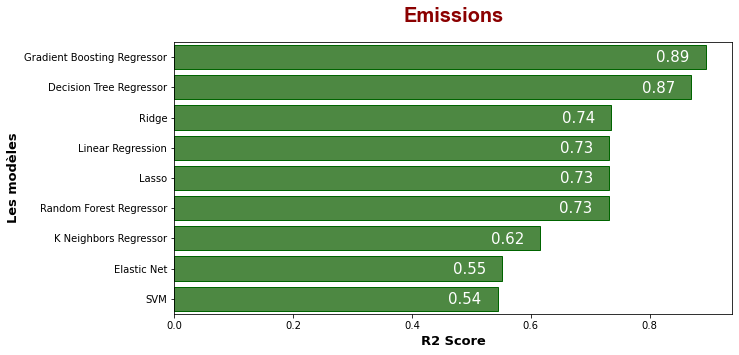

In [41]:
plt.figure(figsize=(10, 5))
plt.title('Emissions', fontdict=font, pad=20)
col_hist = sns.barplot(x=df_scores['R2'],
                       y=df_scores['modele'],
                       edgecolor='darkgreen',
                       color='#459436') 
plt.ylabel('Les modèles', size=13, weight='bold')
plt.xlabel('R2 Score', size=13, weight='bold')

for p in col_hist.patches:
    col_hist.annotate(format(round(p.get_width(),2)),
                      (p.get_width() - 0.1, p.get_y() + 0.1 + p.get_height()),
                      #weight='bold',
                      color='#ffffff',
                      fontsize=15,
                      #ha='center',
                      #va='center',
                      xytext=(10, 10),
                      textcoords='offset points')
plt.show()

# 9. Modèle Sélection

https://www.statsmodels.org/dev/examples/notebooks/generated/interactions_anova.html#